C:\Users\janan\AppData\Local\Temp\ipykernel_27548\724987086.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


MAE: 13.12
RMSE: 19.36
R² Score: 0.55


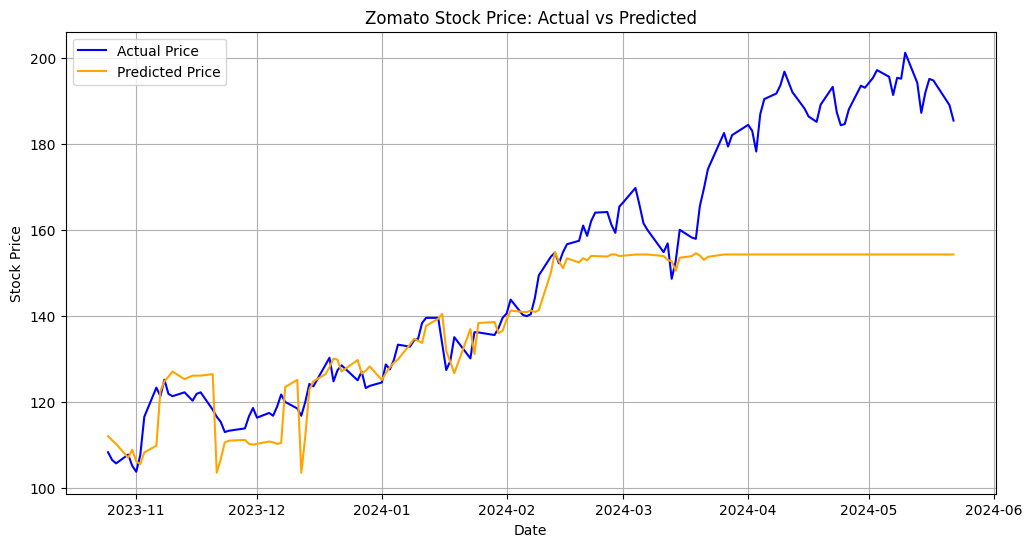

In [2]:
import pandas as pd 

import numpy as np 

from sklearn.ensemble import RandomForestRegressor 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 

 

# 1. Load Zomato stock data (download from Yahoo Finance or Kaggle) 

df = pd.read_csv('Zomato Dataset.csv')

df['Date'] = pd.to_datetime(df['Date']) 

df.set_index('Date', inplace=True) 

 

# 2. Feature Engineering: Create lag features 

df['Close_1'] = df['Close'].shift(1) 

df['Close_2'] = df['Close'].shift(2) 

df['Close_3'] = df['Close'].shift(3) 

 

df.dropna(inplace=True) 

 

# 3. Define features and target 

X = df[['Close_1', 'Close_2', 'Close_3']] 

y = df['Close'] 

 

# 4. Train-test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) 

 

# 5. Train Random Forest Regressor 

model = RandomForestRegressor(n_estimators=100, random_state=42) 

model.fit(X_train, y_train) 

 

# 6. Make predictions 

predictions = model.predict(X_test) 

 

# 7. Evaluate performance 

mae = mean_absolute_error(y_test, predictions) 

rmse = np.sqrt(mean_squared_error(y_test, predictions)) 

r2 = r2_score(y_test, predictions) 

 

print(f"MAE: {mae:.2f}") 

print(f"RMSE: {rmse:.2f}") 

print(f"R² Score: {r2:.2f}") 

 

# 8. Plot actual vs predicted 

plt.figure(figsize=(12, 6)) 

plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue') 

plt.plot(y_test.index, predictions, label='Predicted Price', color='orange') 

plt.title('Zomato Stock Price: Actual vs Predicted') 

plt.xlabel('Date') 

plt.ylabel('Stock Price') 

plt.legend() 

plt.grid(True) 

plt.show()   
